In [10]:
import pickle
from dataprocessing import load_data
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
!pip3 install imblearn
!pip3 install xgboost

In [12]:
with open("model.pickle","rb") as picklefile:
    model = pickle.load(picklefile)

In [5]:
X_train, X_test, y_train, y_test = load_data("../data/healthcare-dataset-stroke-data.csv")

        age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
49833  42.0           0.0            0.0             112.98  37.2   
20375  78.0           0.0            0.0              78.29  30.1   
39834  28.0           0.0            0.0              73.27  25.4   
42550  81.0           0.0            0.0             246.34  21.1   
19907  52.0           0.0            0.0              97.05  28.0   
...     ...           ...            ...                ...   ...   
26893   8.0           0.0            0.0             101.26  33.8   
15663  11.0           0.0            0.0              76.74  19.1   
47321  74.0           0.0            0.0              83.58  18.2   
50843  20.0           0.0            0.0             100.33  27.8   
57622  30.0           0.0            0.0             110.55  30.9   

       is_user_diabetic  Female  Govt_job  Male  Never_worked  ...  \
id                              

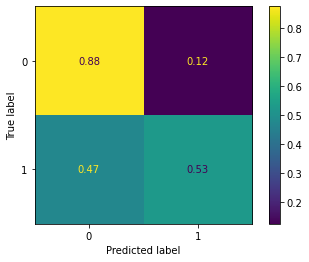

In [7]:

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions,normalize = 'true', labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot() 


        age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
49833  42.0           0.0            0.0             112.98  37.2   
20375  78.0           0.0            0.0              78.29  30.1   
39834  28.0           0.0            0.0              73.27  25.4   
42550  81.0           0.0            0.0             246.34  21.1   
19907  52.0           0.0            0.0              97.05  28.0   
...     ...           ...            ...                ...   ...   
26893   8.0           0.0            0.0             101.26  33.8   
15663  11.0           0.0            0.0              76.74  19.1   
47321  74.0           0.0            0.0              83.58  18.2   
50843  20.0           0.0            0.0             100.33  27.8   
57622  30.0           0.0            0.0             110.55  30.9   

       is_user_diabetic  Female  Govt_job  Male  Never_worked  ...  \
id                              

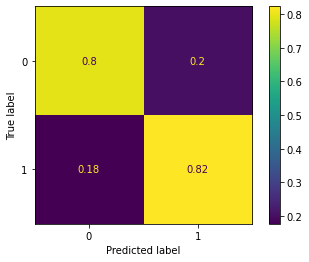

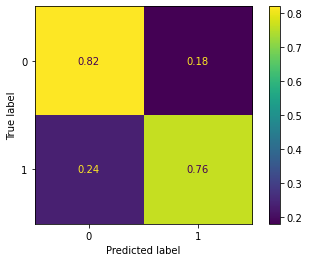

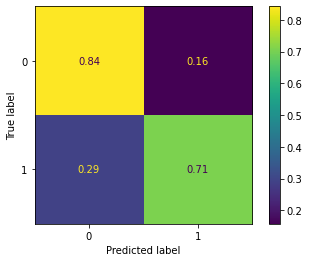

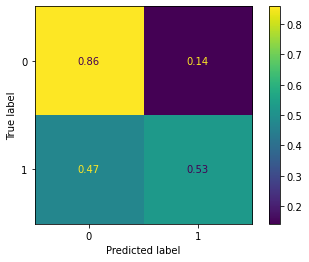

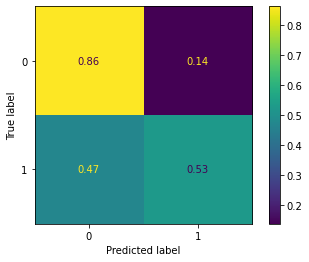

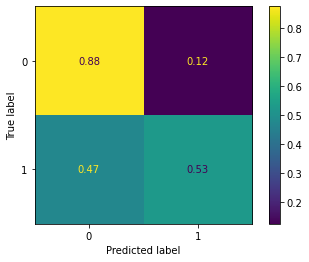

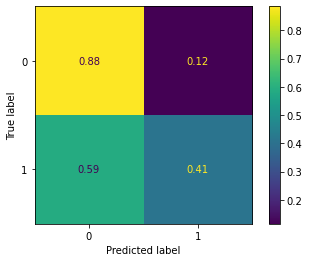

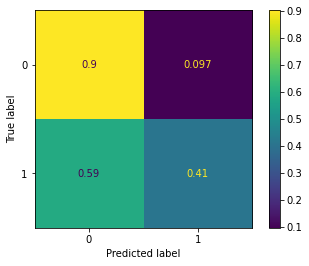

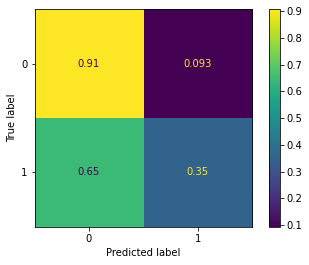

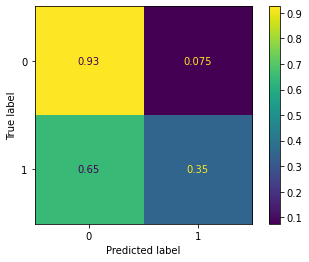

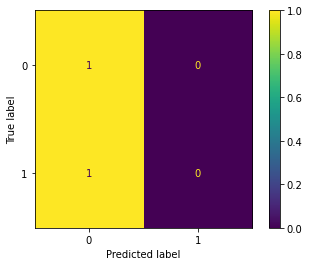

In [23]:
prediction_probas = model.predict_proba(X_test)[:,-1]



thresholds = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for i in thresholds:
    rounded_prediction = np.where(prediction_probas >= i , 1, 0)
    print("Threshold: {}".format(i))
    cm =  confusion_matrix(y_test,rounded_prediction,labels = model.classes_,normalize = 'true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=model.classes_)
    disp.plot()


        age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
49833  42.0           0.0            0.0             112.98  37.2   
20375  78.0           0.0            0.0              78.29  30.1   
39834  28.0           0.0            0.0              73.27  25.4   
42550  81.0           0.0            0.0             246.34  21.1   
19907  52.0           0.0            0.0              97.05  28.0   
...     ...           ...            ...                ...   ...   
26893   8.0           0.0            0.0             101.26  33.8   
15663  11.0           0.0            0.0              76.74  19.1   
47321  74.0           0.0            0.0              83.58  18.2   
50843  20.0           0.0            0.0             100.33  27.8   
57622  30.0           0.0            0.0             110.55  30.9   

       is_user_diabetic  Female  Govt_job  Male  Never_worked  ...  \
id                              

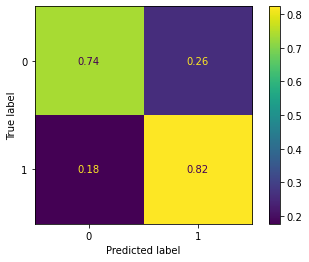

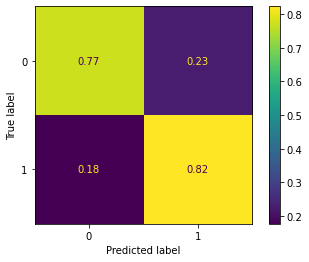

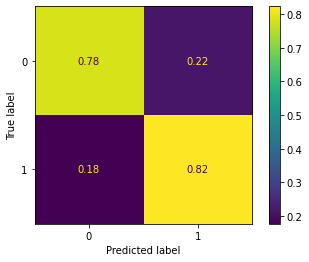

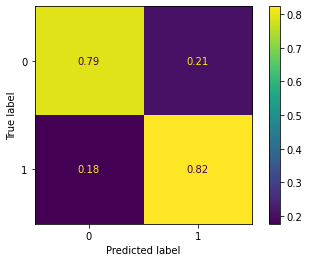

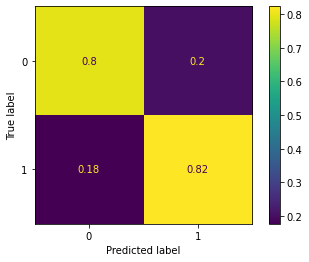

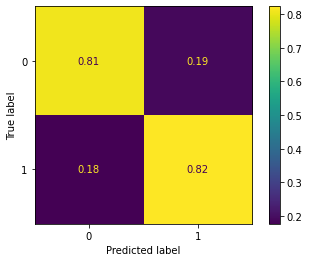

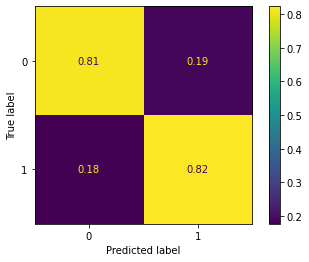

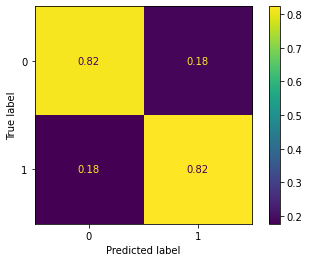

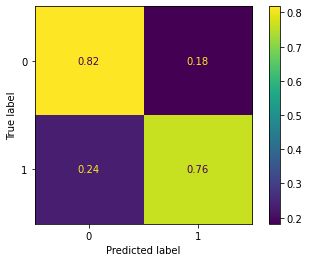

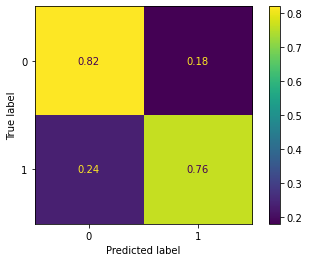

In [24]:
prediction_probas = model.predict_proba(X_test)[:,-1]



thresholds = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]

for i in thresholds:
    rounded_prediction = np.where(prediction_probas >= i , 1, 0)
    print("Threshold: {}".format(i))
    cm =  confusion_matrix(y_test,rounded_prediction,labels = model.classes_,normalize = 'true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=model.classes_)
    disp.plot()


## Seems like the golden mark for our threshhold is 0.08
